In [143]:
%load_ext autoreload
%autoreload 2
from xrayproject.utils import load_train, load_masks
import xrayproject.utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [146]:
path_image = '/Users/kimhedelin/code/kenzocaine/xrayproject/raw_data/ChinaSet_AllFiles/CXR_png/'
path_mask = '/Users/kimhedelin/code/kenzocaine/xrayproject/raw_data/mask/'

masks, targets, ID = load_masks(50, get_all = False, get_random = True, balanced = True, path = path_mask)

In [147]:
images, ID = load_train(path_image, ID )

In [148]:
ID

[381,
 382,
 537,
 658,
 475,
 364,
 480,
 374,
 651,
 459,
 524,
 570,
 327,
 513,
 634,
 463,
 456,
 612,
 380,
 377,
 406,
 369,
 662,
 466,
 621,
 92,
 178,
 319,
 326,
 22,
 158,
 272,
 102,
 115,
 9,
 306,
 153,
 171,
 21,
 11,
 74,
 62,
 49,
 228,
 31,
 63,
 7,
 256,
 253,
 313]

In [140]:
for mask in masks:
    if type(mask) == int:
        print(mask)

In [142]:
len(masks)

50

[381,
 382,
 537,
 658,
 475,
 364,
 480,
 374,
 651,
 459,
 524,
 570,
 327,
 513,
 634,
 463,
 456,
 612,
 380,
 377,
 406,
 369,
 662,
 466,
 621,
 92,
 178,
 319,
 326,
 22,
 158,
 272,
 102,
 115,
 9,
 306,
 153,
 171,
 21,
 11,
 74,
 62,
 49,
 228,
 31,
 63,
 7,
 256,
 253,
 313]

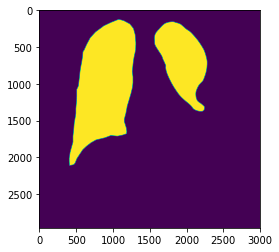

In [153]:
plt.imshow(masks[0])
ID

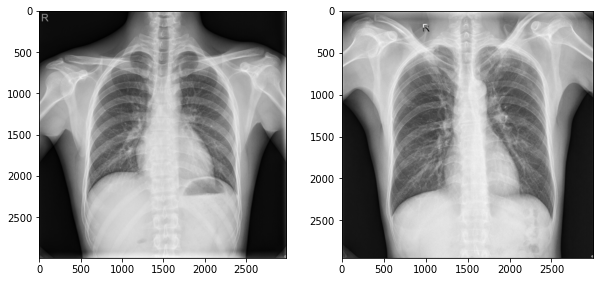

In [4]:
import matplotlib.pyplot as plt
plt.subplots(figsize = (10,10))
for i in range(2):
    plt.subplot(2,2,i+1)
    plt.imshow(img[i])



In [98]:
def normalize(input_image, input_mask):
    input_image = tf.cast(input_image, tf.float32) / 255.0
    return input_image, input_mask

In [194]:
import tensorflow as tf
image_norm_list = []
mask_norm_list = []
for image, mask in zip(images, masks):
    image_norm, mask_norm = normalize(image, mask)
    image_norm_list.append(image_norm)
    mask_norm_list.append(mask_norm)

In [157]:
mask_norm_list[1].shape

TensorShape([2897, 2499, 1])

In [152]:
images[1].shape

TensorShape([2897, 2499, 3])

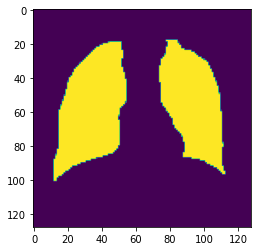

In [196]:
plt.imshow(tf.image.resize(masks[1], (128, 128)))


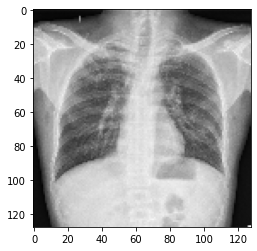

In [197]:
plt.imshow(tf.image.resize(image_norm_list[1], (128,128)))

In [183]:
t_im = images[1]
t_ma = masks[1]
t_im.shape

TensorShape([2897, 2499, 3])

In [184]:
t_ma.shape

TensorShape([2897, 2499, 1])

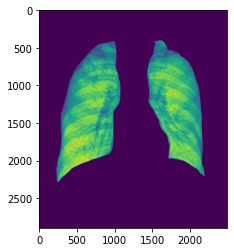

In [190]:
import numpy as np
plt.imshow(t_im[:,:,0:1]*t_ma)

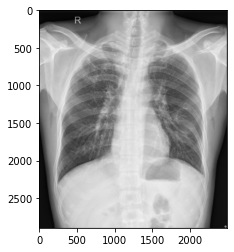

In [195]:
plt.imshow(image_norm_list[1])

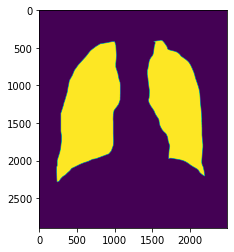

In [192]:
plt.imshow(t_ma)

In [199]:
sum(t_ma[:,])/(t_ma.shape[0] * t_ma.shape[1])

<tf.Tensor: shape=(2499, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)>